In [1]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

## ループ整形の例題

$P(s)=\frac{10}{(s+1)(s+10)}$

に対して，以下の仕様を満たす位相進み・遅れ補償を設計せよ

* ゲイン交差周波数を 20 rad/s
* 位相余裕を 60°
* 定常偏差を改善（定常偏差 0.01 以下）

In [2]:
P = tf( [0,10], [1, 11, 10] )

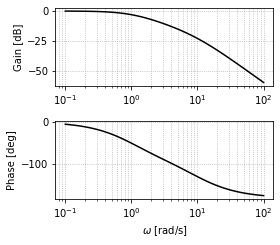

In [3]:
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(P, logspace(-1,2), Plot=False)
    
ax[0].semilogx(w, 20*np.log10(gain), color='k')
ax[1].semilogx(w, phase*180/np.pi, color='k')
ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')

fig.tight_layout()

制御対象のボード線図． 低周波ゲインが０[dB]なので，このままフィードバック系を構築しても定常偏差が残る．

### 位相遅れ補償の設計

定常偏差を小さくするために，位相遅れ補償から設計する

低周波ゲインを上げるために，$\alpha=20$ とする．
そして，ゲインを上げる周波数は，$T_1$ で決めるが，
最終的なゲイン交差周波数（ゲイン交差周波数の設計値）の１０分の１程度を$1/T_1$
にするために，$T_1=0.5$ とする（$1/T_1=20/10=2$）．

K1= 
10 s + 20
---------
10 s + 1

-----------------------
phase at 20rad/s = -155.99666022403284


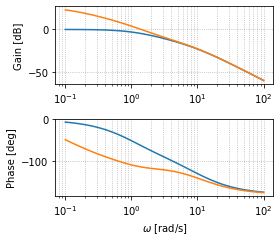

In [4]:
alpha = 20
T1 = 0.5
K1 = tf([alpha*T1, alpha], [alpha*T1, 1])
print('K1=', K1)

fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 
H1 = P*K1
gain, phase, w = bode(P, logspace(-1,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)

gain, phase, w = bode(H1, logspace(-1,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)

ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')
fig.tight_layout()

[[[mag]]], [[[phase]]], omega = freqresp(H1, [20])
#magH1at20 = mag
phaseH1at20 = phase * (180/np.pi)
print('-----------------------')
#print('gain at 20rad/s =', 20*np.log10(magH1at20))
print('phase at 20rad/s =', phaseH1at20)

#fig.savefig("test.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

最終的にゲイン補償によって，ゲイン交差周波数を設計値の20[rad/s]まで上げるが，あげてしまうと，位相余裕が60[dB]を下回る．実際， 20[rad/s]における位相は -156[deg]なので，位相余裕は 24[deg]程度になってしまう．したがって，20[rad/s]での位相を -120[deg] まであげておく．

### 位相進み補償の設計

20[rad/s]において位相を進ませる量は　60 - (180-156) = 36[deg]程度とする．

K2= 
0.09812 s + 1
-------------
0.02548 s + 1

-----------------------
gain at 20rad/s = -27.121982029204407
phase at 20rad/s = -119.99999999999999


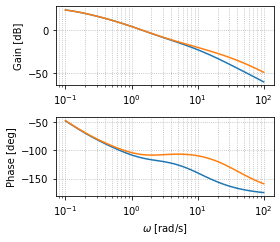

In [5]:
phim = (60- (180 + phaseH1at20 ) ) * np.pi/180
beta = (1-np.sin(phim))/(1+np.sin(phim))
T2 = 1/20/np.sqrt(beta)
K2 = tf([T2, 1],[beta*T2, 1])
print('K2=', K2)

fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(H1, logspace(-1,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)

H2 = P*K1*K2
gain, phase, w = bode(H2, logspace(-1,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)
ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')

fig.tight_layout()

[[[mag]]], [[[phase]]], omega = freqresp(H2, [20])
magH2at20 = mag
phaseH2at20 = phase * (180/np.pi)
print('-----------------------')
print('gain at 20rad/s =', 20*np.log10(magH2at20))
print('phase at 20rad/s =', phaseH2at20)

#fig.savefig("test.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

位相進み補償により，20[rad/s]での位相が -120[deg]となっている． あとは，ゲイン補償により，20[rad/s]のゲインを 0[dB] にすればよい．

### ゲイン補償の設計

20[rad/s] におけるゲインが0[dB]となるようにk=1/magH2at20
 をゲイン補償とする． これにより，20[rad/s]がゲイン交差周波数になり，位相余裕もPM=60[deg]となる．

k= 22.703828704125367


/Users/minami/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


-----------------
(GM, PM, wpc, wgc)
(inf, 59.99999999999994, nan, 20.00000000000004)


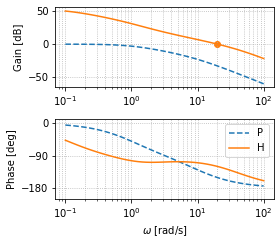

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

k = 1/magH2at20
print('k=', k)

gain, phase, w = bode(P, logspace(-1,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain), ls='--', label='P')
ax[1].semilogx(w, phase*180/np.pi, ls='--', label='P')

H = P*k*K1*K2
gain, phase, w = bode(H, logspace(-1,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain), label='H')
ax[1].semilogx(w, phase*180/np.pi, label='H')

gm, pm, wcp, wgc = margin(P)
ax[0].scatter(wgc,0)

gm, pm, wpc, wgc = margin(H)
ax[0].scatter(wgc,0)

ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')
ax[1].set_ylim(-210,10)
ax[1].set_yticks([-180,-90,0])
ax[1].legend()
fig.tight_layout()

print('-----------------')
print('(GM, PM, wpc, wgc)')
print(margin(H))

#fig.savefig("test.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 閉ループ系の応答

error= 0.5
------------------
error= 0.0021974323816077446
------------------


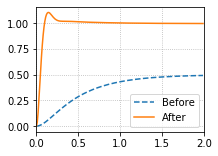

In [7]:
fig, ax = plt.subplots(figsize=(3, 2.3))

Gyr_P = feedback(P, 1)
y, t = step(Gyr_P, np.arange(0,2,0.01))
pltargs = {'ls': '--', 'label': 'Before'}
ax.plot(t, y, **pltargs)
    
e_std = 1 - dcgain(Gyr_P)
print('error=', e_std)    
print('------------------')

Gyr_H = feedback(H, 1)
y, t = step(Gyr_H, np.arange(0,2,0.01))

ax.plot(t,y, label='After')

e_std = 1 - dcgain(Gyr_H)
print('error=', e_std)    
print('------------------')

ax.set_xlim(0,2)
ax.grid(ls=':')
ax.legend()

#fig.savefig("test.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

In [8]:
stepinfo(Gyr_H)

{'RiseTime': 0.06369987886524764,
 'SettlingTime': 0.4425465268532994,
 'SettlingMin': 0.9174442151547594,
 'SettlingMax': 1.1062942095998332,
 'Overshoot': 10.868069626973165,
 'Undershoot': 0.0,
 'Peak': 1.1062942095998332,
 'PeakTime': 0.14416288374766573,
 'SteadyStateValue': 0.9978474535743898}

直流ゲイン = -6.020599913279624
------------------
直流ゲイン = -0.01910765674282279
------------------


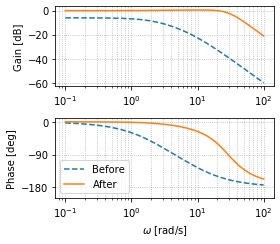

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(Gyr_P, logspace(-1,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
ax[1].semilogx(w, phase*180/np.pi, **pltargs)

print('直流ゲイン =', 20*np.log10(Gyr_P.dcgain()))    
print('------------------')

gain, phase, w = bode(Gyr_H, logspace(-1,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain), label='After')
ax[1].semilogx(w, phase*180/np.pi, label='After')

print('直流ゲイン =', 20*np.log10(Gyr_H.dcgain()))    
print('------------------')

ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')
ax[1].set_ylim(-210,10)
ax[1].set_yticks([-180,-90,0])
ax[1].legend()

fig.tight_layout()
#fig.savefig("loop_leadlag_fbbode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 積分サーボ系
積分サーボ系を構築することで，一定値の目標値に出力を追従させることができます また，一定値の外乱やモデル化誤差の影響を消すことができます

In [10]:
A = [[0, 1], [-4, 5]]
B = [[0], [1]]
C = [1, 0]
D = [0]
P = ss(A, B, C, D)

拡大系を構築し，フィードバックゲイン（状態FBと積分器のゲイン）を設計する

In [11]:
Abar = np.r_[ np.c_[P.A, np.zeros((2,1))], -np.c_[ P.C, 0 ] ]
Bbar = np.c_[ P.B.T, 0 ].T
Cbar = np.c_[ P.C, 0 ]

In [12]:
Pole = [-1, -1, -5]
F = -acker(Abar, Bbar, Pole)
F

matrix([[ -7., -12.,   5.]])

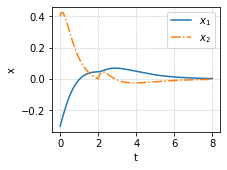

In [13]:
Acl = Abar + Bbar*F
Pfb = ss(Acl, Bbar, np.eye(3), np.zeros((3,1)))

Td = np.arange(0, 8, 0.01)
Ud = 0.5 * (Td>2) # ステップ状の外乱
x, t, _ = lsim(Pfb, Ud, Td, [-0.3, 0.4, 0])
 
fig, ax = plt.subplots(figsize=(3, 2.3))
ax.plot(t, x[:,0], label = '$x_1$')
ax.plot(t, x[:,1], ls = '-.',label = '$x_2$')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.legend()
ax.grid(ls=':')
#fig.savefig("test.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

２秒後に一定値の外乱が加わるが，その影響を受けず最終的に０に収束している

### オブザーバ

In [14]:
A = [[0, 1], [-4, 5]]
B = [[0], [1]]
C = [1, 0]
D = [0]
P = ss(A, B, C, D)

# レギュレータ極
regulator_poles = [-5+5j, -5-5j]
# 極配置
F = -acker(P.A, P.B, regulator_poles)
print(F)

[[-46. -15.]]


オブザーバゲインの設計はackerを用いる．Aの転置とCの転置を引数とすると，Lの転置がもとまる（双対性）

In [15]:
# オブザーバ極
observer_poles=[-15+5j,-15-5j]

# オブザーバゲインの設計（状態フィードバックの双対） 
L = -acker(P.A.T, P.C.T, observer_poles).T
print(L)

[[ -35.]
 [-421.]]


In [16]:
Gsf = ss(P.A + P.B*F, P.B, np.eye(2), [[0],[0]])
Obs = ss(P.A + L*P.C, np.c_[P.B, -L], np.eye(2), np.zeros((2,2)) )

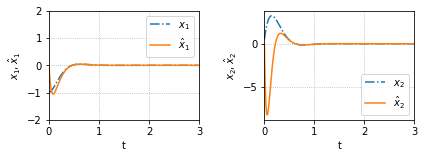

In [17]:
fig, ax = plt.subplots(1,2, figsize=(6, 2.3))

T = np.arange(0, 3, 0.01)
X0 = [-1, 0.5]
x, t = initial(Gsf, T, X0)
ax[0].plot(t, x[:, 0], ls='-.', label='${x}_1$')
ax[1].plot(t, x[:, 1], ls='-.', label='${x}_2$')

# 入力 u = Fx
u = [ [F[0,0]*x[i,0]+F[0,1]*x[i,1]] for i in range(len(x))]
# 出力 y = Cx
y = x[:, 0]
# オブザーバで推定した状態の振る舞い
xhat, t, x0 = lsim(Obs, np.c_[u, y], T, [0, 0])
ax[0].plot(t, xhat[:, 0], label='$\hat{x}_1$')
ax[1].plot(t, xhat[:, 1], label='$\hat{x}_2$')

for i in [0, 1]:
    ax[i].set_xlabel('t')
    ax[i].set_xlim([0, 3])
    ax[i].grid(ls=':')
    ax[i].legend()

ax[0].set_ylim([-2, 2])
ax[0].set_ylabel('$x_1, \hat{x}_1$')
ax[1].set_ylabel('$x_2, \hat{x}_2$')

fig.tight_layout()
#fig.savefig("test.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)